# Graded Challenge 3 Phase 1

## 1. Introduction

Name            : Franciscus Andrew Sunanda

Batch           : FTDS-RMT-018

Dataset         : Heart Failure Data Set

Objective       : Dapat memprediksi apakah seseorang akan mengalami Heart Failure berdasarkan kondisi kesehatan nya

Evaluasi nya menggunakan Recall dari Classification Report, Accuracy Score, dan False Negative Rate

## 2. SQL Query

Berikut ini adalah SQL Queries yang saya pakail untuk mengambil data nya dari Google Cloud Platform:

```
SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_018_rmt.heart-failure`
```

## 3. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import classification_report
from scipy.stats import randint
import json
import pickle

## 4. Data Loading

In [2]:
# Read File CSV Dataset yang sudah di download dari Google Cloud
df = pd.read_csv('h8dsft_P1G3_andrewsunanda.csv')
# Tampilkan 10 data pertama
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [3]:
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [4]:
# Tampilkan Info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# Rename nama column agar lebih mudah digunakan

df = df.rename(columns={'anaemia': 'anemia','creatinine_phosphokinase': 'cpk', 'high_blood_pressure': 'hypertension', 'DEATH_EVENT': 'death'})

Berikut ini adalah list column yang ada dalam dataset ini

Header | Definition | Keys
---|---|---
`age` | Age (in years) |
`anaemia` | Decrease of red blood cells | 0 = No, 1 = Yes
`cpk` | Level of the CPK enzyme in the blood (mcg/L) |
`diabetes` | If the patient has diabetes | 0 = No, 1 = Yes
`ejection_fraction` | Percentage of blood leaving the heart at each contraction (percentage) |
`hypertension` | If the patient has hypertension | 0 = No, 1 = Yes
`platelets` | Platelets in the blood (kiloplatelets/mL) |
`serum_creatinine` | Level of serum creatinine in the blood (mg/dL)
`serum_sodium` | Level of serum sodium in the blood (mEq/L)
`sex` | Gender | 0 = Female, 1 = Male
`smoking` | If the patient smokes or not | 0 = No, 1 = Yes
`time` | Follow-up period (in days) |
`death` | If the patient deceased during the follow-up period | 0 = No, 1 = Yes

## 5. Exploratory Data Analysis (EDA)

### Cek Missing Values dan Duplikasi Data

In [6]:
# Copy ke Variable Baru

data = df.copy()

In [7]:
# Cek jika ada missing value
data.isna().sum()

age                  0
anemia               0
cpk                  0
diabetes             0
ejection_fraction    0
hypertension         0
platelets            0
serum_creatinine     0
serum_sodium         0
sex                  0
smoking              0
time                 0
death                0
dtype: int64

In [8]:
# Cek jika ada data yang terduplikasi
data.duplicated().value_counts()

False    299
dtype: int64

Dalam data set ini sudah bersih, sudah tidak ada missing values maupun data yang terduplikasi

### Checking Balance or Imbalance Classification

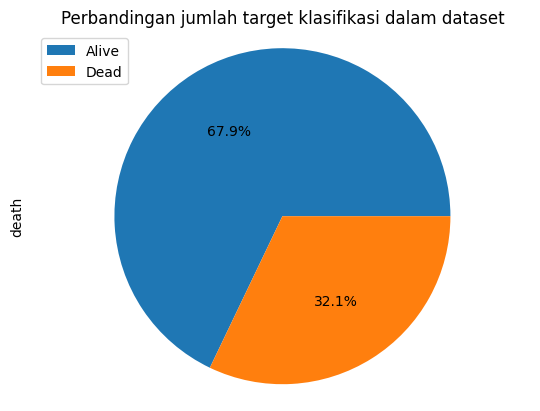

In [9]:
kelas = data['death'].value_counts()

kelas.plot(kind='pie',
        autopct='%1.1f%%', # untuk membuat persentase  
        labels=None,
        )

plt.title('Perbandingan jumlah target klasifikasi dalam dataset')
plt.axis('equal') 
plt.legend(labels=['Alive','Dead'], loc='upper left')

plt.show()

Kita lihat dari piechart diatas, dalam data kali ini data termasuk Mild Imbalance, jadi ada baik nya nanti kita lakukan resampling data agar menjadi lebih balance, untuk memastikan model yang kita buat dapat memprediksi dengan lebih akurat

### Each Features Correlation with Heart Failure

<AxesSubplot: >

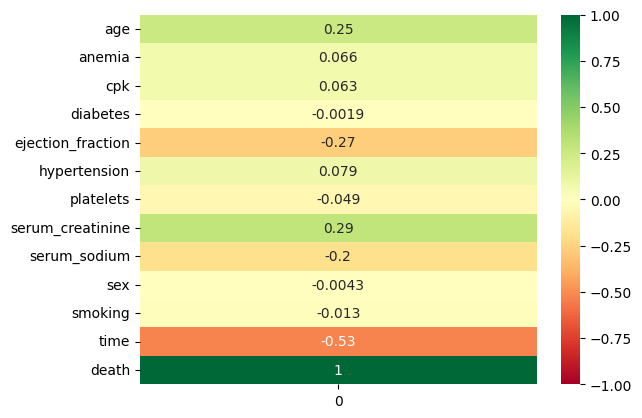

In [10]:
corr = data.corrwith(data['death'])
sns.heatmap(corr.to_frame(), cmap='RdYlGn', annot=True, vmin=-1,vmax=1)

- Column Time menonjol kelihatan nya sebagai column nya paling negatively effect Hasil Klasifikasi nya. Asumsi nya berarti semakin lama (tinggi) patient tersebut bertahan setelah menerima bantuan medis, maka kemungkinan lebih besar patient akan hidup
- Sebaliknya, yang paling positively effect kematian patient tampak nya adalah column serum_creatinine. Dapat diasumsikan bahwa semakin tinggi serum creatinine ini (diluar batas normal) makan kemungkinan untuk meninggal semakin besar
- Kita akan cek lagi asumsi yang telah kita buat di bagian berikut nya

### Time

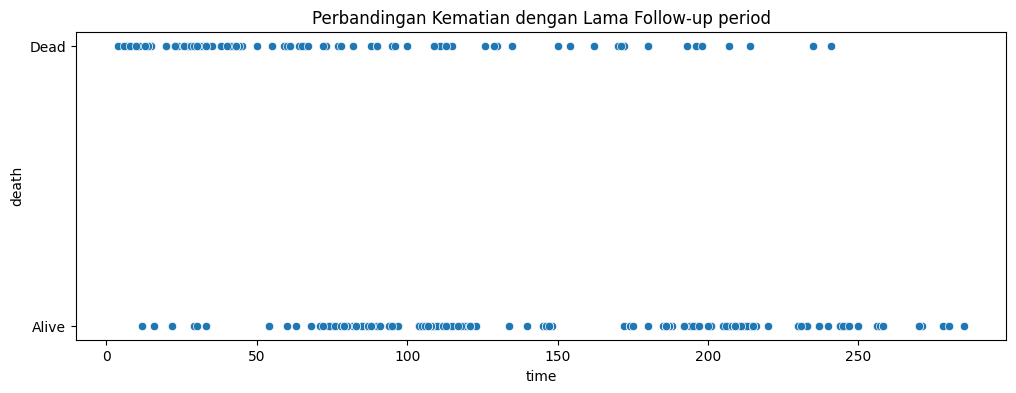

In [11]:
# Buat Plot
plt.figure(figsize=(12, 4))
sns.scatterplot(x='time', y='death', data=data)
plt.title('Perbandingan Kematian dengan Lama Follow-up period')
plt.yticks([0, 1], ['Alive', 'Dead'])
plt.show()

Bisa kita bilang asumsi yang telah kita buat sebelum nya bisa dibilang somewhat betul, karena bagi orang yang menerima bantuan selama di bawah 50 hari, sangat jarang yang bisa bertahan hidup

### Serum Creatinine

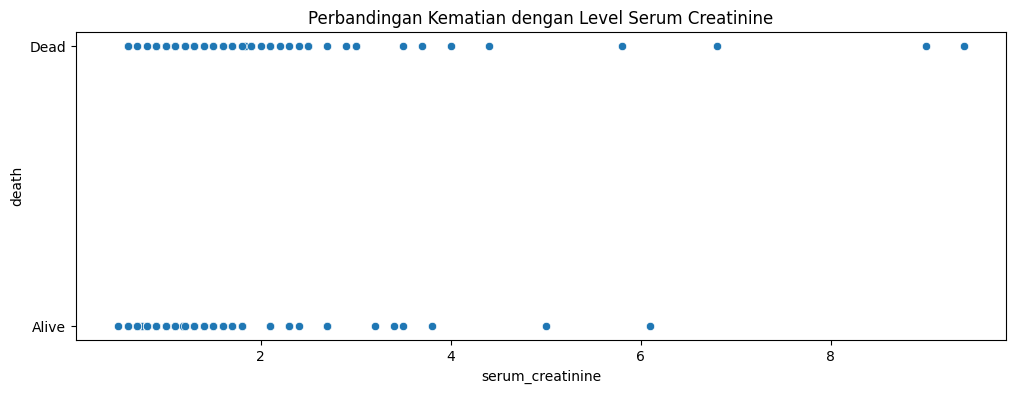

In [12]:
# Buat Plot
plt.figure(figsize=(12, 4))
sns.scatterplot(x='serum_creatinine', y='death', data=data)
plt.title('Perbandingan Kematian dengan Level Serum Creatinine')
plt.yticks([0, 1], ['Alive', 'Dead'])
plt.show()

Asumsi kita mengenai Serum Creatinine ini tidak bisa dibilang sepenuh nya betul karena kalau dilihat di bagian yang Alive, ada juga patient dengan level serum creatinine ini yang sudah sangat tinggi dibandingkan nilai normal orang dewasa, namun masih bisa staying alive setelah menerima bantuan medis

Referensi : [Level Normal Serum Creatinine](https://www.wikihow.com/images/thumb/e/ea/Bring-Down-High-Creatinine-Levels-Step-3-Version-3.jpg/v4-460px-Bring-Down-High-Creatinine-Levels-Step-3-Version-3.jpg.webp)

### Hypertension and Anemia

Setelah melakukan searching di google, saya menemukan suatu [sumber](https://www.alodokter.com/gagal-jantung) dimana  disana menyatakan bahwa Gagal Jantung ini dapat disebabkan oleh Anemia dan Hypertensi. Maka saya akan coba cek apakah dalam dataset ini Anemia dan Hypertensi ini sangat mempengaruhi outcome nya

In [13]:
# Ubah menjadi dataframe terpisah untuk di buat menjadi plot
test = data.groupby(['hypertension','anemia', 'death']).size().reset_index(name='count')
test['category'] = test['hypertension'].astype(str) + '-' + test['anemia'].astype(str)
test

,hypertension,anemia,death,count,category
0,0,0,0,83,0-0
1,0,0,1,30,0-0
2,0,1,0,54,0-1
3,0,1,1,27,0-1
4,1,0,0,37,1-0
5,1,0,1,20,1-0
6,1,1,0,29,1-1
7,1,1,1,19,1-1


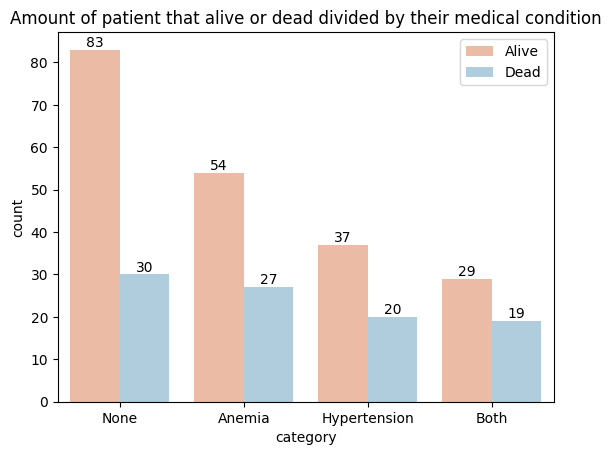

In [14]:
plt.figure()
ax = sns.barplot(x='category', y='count', data=test, hue='death', palette='RdBu')
plt.title('Amount of patient that alive or dead divided by their medical condition')
for i in ax.containers:
    ax.bar_label(i,)
handles, labels = ax.get_legend_handles_labels()
plt.xticks([0, 1, 2, 3], ['None', 'Anemia', 'Hypertension', 'Both'])
plt.legend(handles=handles, labels=['Alive','Dead'], loc='upper right')
plt.show()

Ternyata benar bahwa Hypertensi dan Anemia dapat mempengaruhi gagal jantung, dimana patient yang tidak memiliki kondisi hypertensi dan anemia memiliki 26% kemungkinan meninggal diakibatkan gagal jantung, sedangkan di kategori patient yang menderita kedua  nya memiliki 40% kemungkinan

### Platelets

Platelets atau trombosit memiliki fungsi penting untuk membantu proses pembekuan darah. Range level normal adalah antara 150k - 450k / mL darah. Jika berlebihan trombosit dapat menyebabkan heart attack dan juga stroke, sedangkan kekurangan membuat pendarahan internal maupun eksternal. Mari kita coba kelompok kan colum platelets ini menjadi category Low, Normal, High

Referensi    : [Apa itu Platelets?](https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important)

In [15]:
# Buat Column Level Trombosit / Platelets
test = data['platelets']
trombosit = []
for x in test:
    if x < 150000:
        trombosit.append('Low')
    elif x >= 450000:
        trombosit.append('High')    
    else:
        trombosit.append('Normal')
data['trombosit'] = trombosit

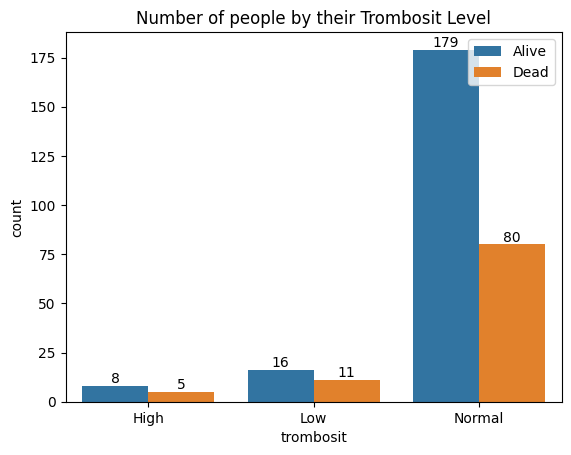

In [16]:
level = data.groupby(['trombosit', 'death']).size().reset_index(name='count')
plt.figure()
ax = sns.barplot(x='trombosit', y='count', data=level, hue='death')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Number of people by their Trombosit Level')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Alive','Dead'], loc='upper right')
plt.show()

Selama level trombosit normal, patient memiliki 30% kemungkinan untuk Gagal Jantung, sedangkan untuk level trombosit yang terlalu tinggi maupun rendah kurang lebih sama di range 38-40%

### Smoking

Seperti yang kita ketahui, merokok dapat menyebabkan segala macam komplikasi penyakit dan sering menjadi salah satu penyebab kematian terbesar di dunia. Mari kita cek apakah fakta tersebut tergambarkan dalam dataset ini

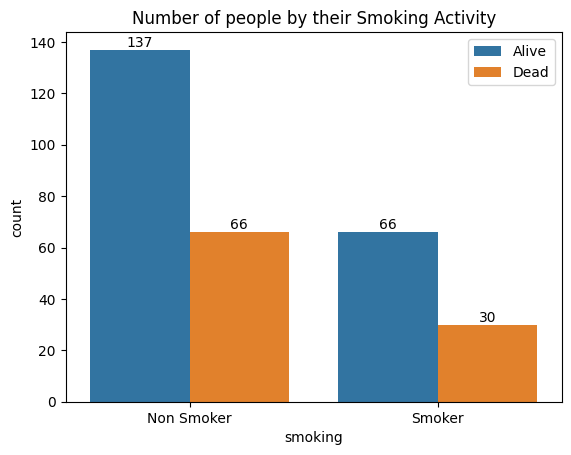

In [17]:
level = data.groupby(['smoking', 'death']).size().reset_index(name='count')
plt.figure()
ax = sns.barplot(x='smoking', y='count', data=level, hue='death')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Number of people by their Smoking Activity')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Alive','Dead'], loc='upper right')
plt.xticks([0, 1], ['Non Smoker', 'Smoker'])
plt.show()

Kelihatan nya dama kasus kita kali ini, gagal jantung tidak bisa dibilang disebabkan oleh apakah seseorang merokok atau tidak. KArena di sini persentase nya fatality rate kurang lebih sama bagi Smoker dan Non Smoker disekitar 31-32%

## 6. Feature Engineering

### Split Between X (Features) and y (Target)

In [17]:
X = data.drop(['death'], axis=1)
y = data['death']

### Split between Train Set and Test Set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)
X_train

,age,anemia,cpk,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,trombosit
8,60.0,1,76,1,25,0,196000.00,2.5,132,0,0,77,Normal
126,45.0,0,7702,1,25,1,390000.00,1.0,139,1,0,60,Normal
33,50.0,1,2334,1,35,0,75000.00,0.9,142,0,0,126,Low
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,Normal
118,59.0,0,66,1,20,0,70000.00,2.4,134,1,0,135,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,55.0,0,109,0,35,0,254000.00,1.1,139,1,1,60,Normal
190,60.0,0,1211,1,35,0,263358.03,1.8,113,1,1,186,Normal
120,45.0,0,582,0,20,1,126000.00,1.6,135,1,0,180,Low
275,85.0,1,910,0,50,0,235000.00,1.3,134,1,0,121,Normal


### Handling Missing Values & Outliers

In [19]:
# Cek Missing Values
X_train.isnull().sum()

age                  0
anemia               0
cpk                  0
diabetes             0
ejection_fraction    0
hypertension         0
platelets            0
serum_creatinine     0
serum_sodium         0
sex                  0
smoking              0
time                 0
trombosit            0
dtype: int64

Tidak ada missing values, sekarang mau handle outliers untuk data yang numerical. Walaupun semua data nya sudah numerical, ada yang sebenarnya merupakan data categorical yang sudah ter encode dalam bentuknumerical, jadi akan saya pisahkan terlebih dahulu

In [20]:
# Get Numerical Columns and Categorical Columns

num_columns = ['age','cpk','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
cat_columns = ['anemia','diabetes', 'hypertension','sex','smoking','trombosit']

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['age', 'cpk', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
Cat Columns :  ['anemia', 'diabetes', 'hypertension', 'sex', 'smoking', 'trombosit']


In [21]:
# Buat fungsi untuk buat plot distribusi data dan boxplot untuk melihat outlier
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

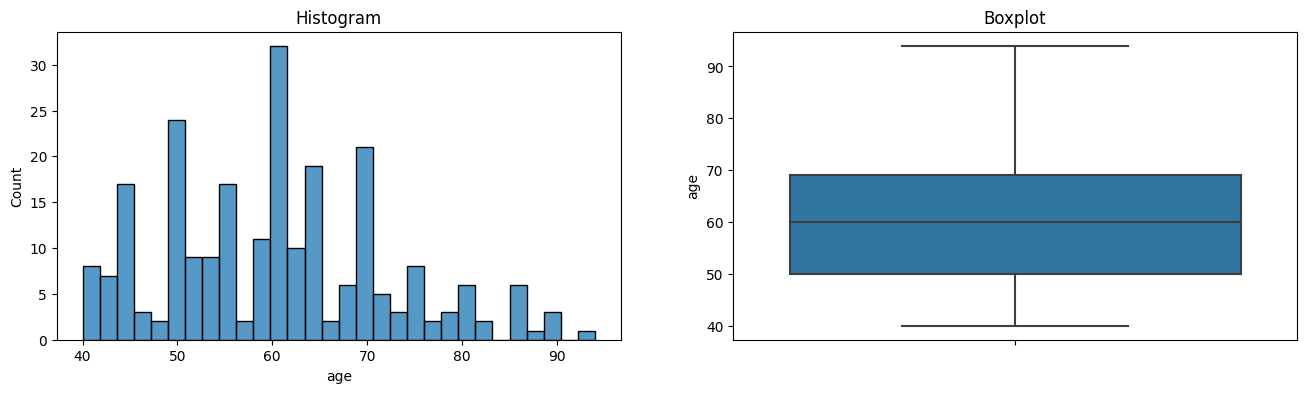

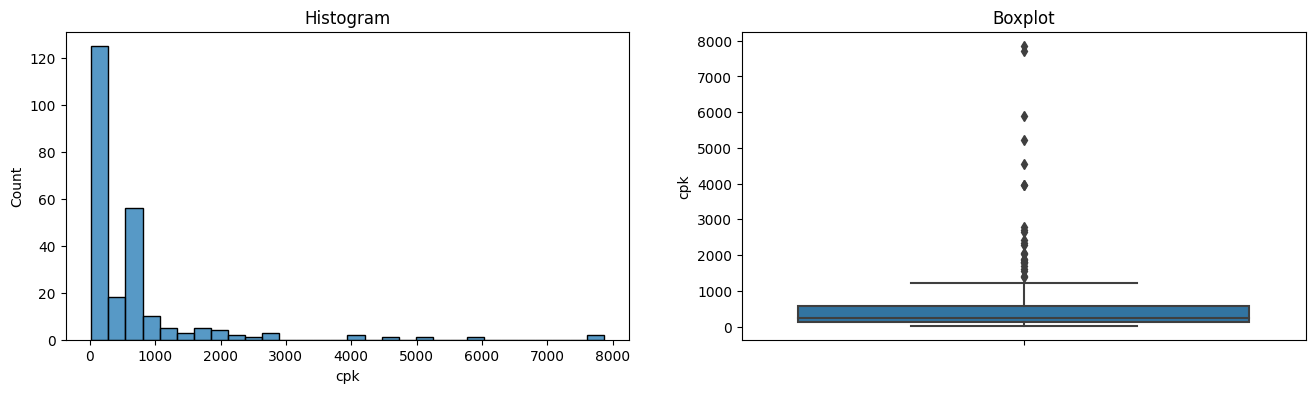

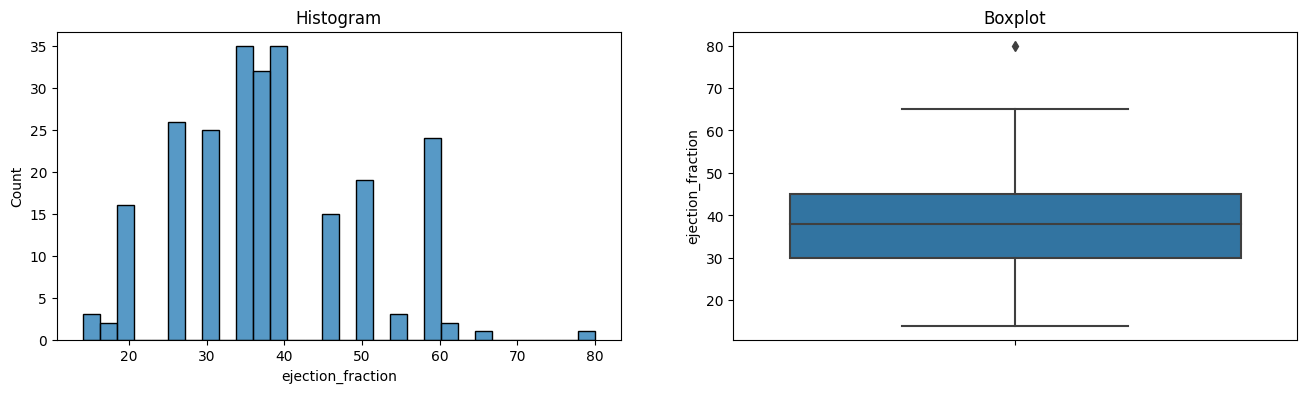

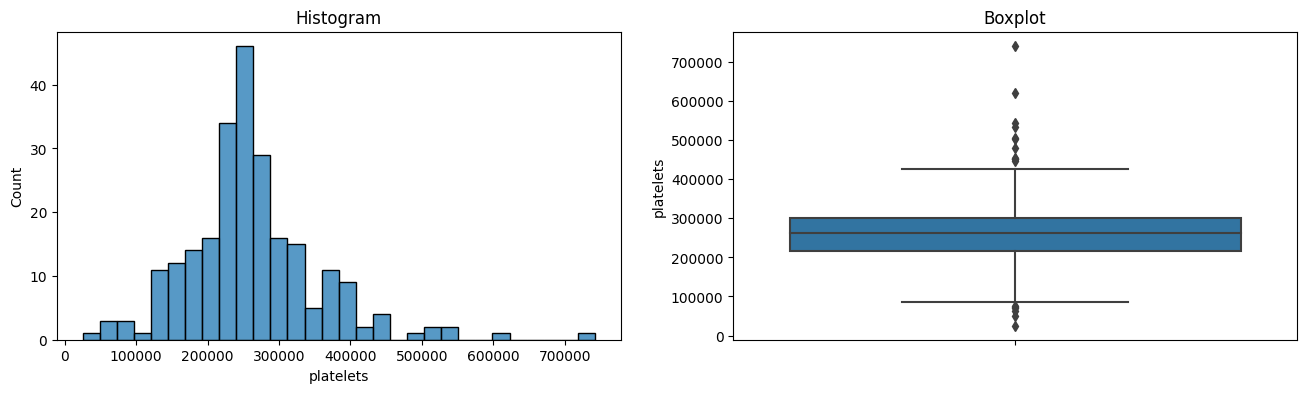

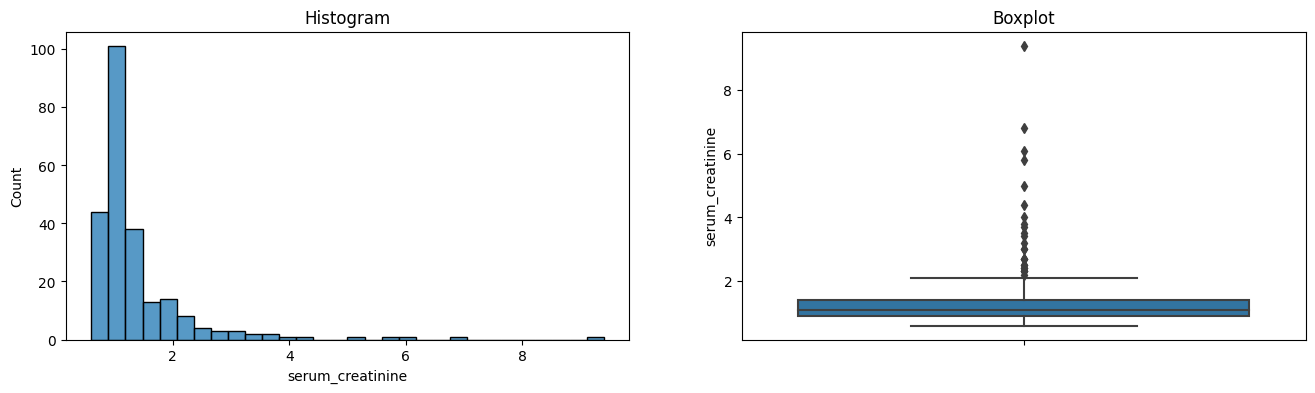

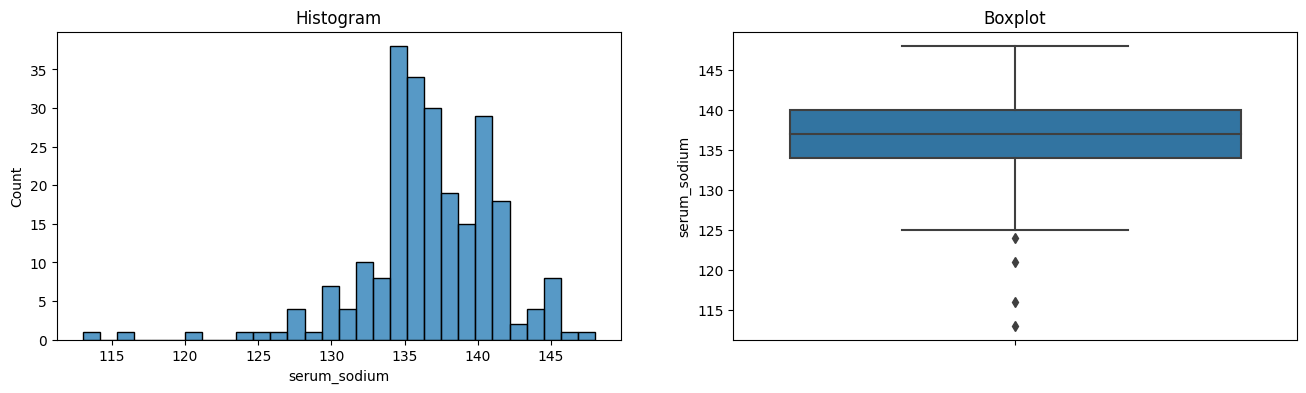

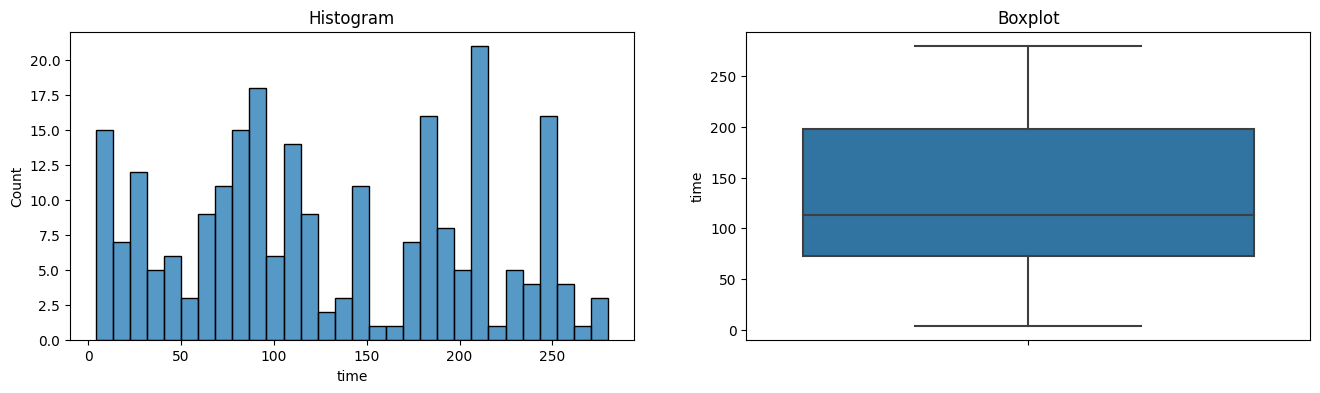


Skewness Value :  age                  0.419578
cpk                  4.279122
ejection_fraction    0.465489
platelets            1.038185
serum_creatinine     4.134526
serum_sodium        -1.160380
time                 0.125864
dtype: float64


In [22]:
for cek in X_train[num_columns]:
    diagnostic_plots(X_train, cek)

print('\nSkewness Value : ', X_train[num_columns].skew())

Karena Random Forest tidak sensitif terhadap outliers, maka saya tidak menganggap data- data diatas sebagai outliers karena menurut saya dalam dunia medis, dapat terjadi kejadian dimana angka angka hasil test yang didapatkan memang luar biasa
- Kalau kita lihat persebaran data CPK memang sanga dominan di level rendah nya, tetapi saya tidak mengganggap yang tinggi itu outlier juga karena memang CPK yang tinggi dapat menyebabkan heart attack, stroke, brain injury, dll
- Ejection Fraction yang dianggap outlier oleh boxplot ini juga malah merupakan ejection fraction yang terbilang sehat di sekitar 80%, dimana memang di bawah 40% baru beresiko menyebabkan gagal jantung

Sumber Referensi:

- [CPK](https://www.mountsinai.org/health-library/tests/creatine-phosphokinase-test#:~:text=Normal%20Results,per%20liter%20(mcg%2FL))
- [Ejection Fraction](https://www.pennmedicine.org/updates/blogs/heart-and-vascular-blog/2022/april/ejection-fraction-what-the-numbers-mean#:~:text=A%20normal%20ejection%20fraction%20is,blood%20and%20may%20be%20failing.)

### Features Selection

In [23]:
# Display Semua Features
X_train.keys()

Index(['age', 'anemia', 'cpk', 'diabetes', 'ejection_fraction', 'hypertension',
       'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking',
       'time', 'trombosit'],
      dtype='object')

Saya akan pakai semua feature nya yang ada dalam table ini, kecuali column Trombosit yang tadi saya buat sendiri untuk di bagian EDA

In [24]:
X_train.drop(['trombosit'], axis=1, inplace=True)
X_test.drop(['trombosit'], axis=1, inplace=True)

### Split Between Numerical Columns and Categorical Columns

In [25]:
# Get Numerical Columns and Categorical Columns

num_columns = ['age','cpk','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
cat_columns = ['anemia','diabetes', 'hypertension','sex','smoking']

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['age', 'cpk', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
Cat Columns :  ['anemia', 'diabetes', 'hypertension', 'sex', 'smoking']


In [26]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,age,cpk,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
8,60.0,76,25,196000.00,2.5,132,77
126,45.0,7702,25,390000.00,1.0,139,60
33,50.0,2334,35,75000.00,0.9,142,126
291,53.0,196,60,220000.00,0.7,133,134
118,59.0,66,20,70000.00,2.4,134,135
...,...,...,...,...,...,...,...
174,55.0,109,35,254000.00,1.1,139,60
190,60.0,1211,35,263358.03,1.8,113,186
120,45.0,582,20,126000.00,1.6,135,180
275,85.0,910,50,235000.00,1.3,134,121


### Feature Scaling

In [27]:
# Feature Scaling using MinMaxScaler karena data tidak ter distribusi normal

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.37037037, 0.00676193, 0.16666667, ..., 0.21590909, 0.54285714,
        0.26449275],
       [0.09259259, 0.97971421, 0.16666667, ..., 0.04545455, 0.74285714,
        0.20289855],
       [0.18518519, 0.29484562, 0.31818182, ..., 0.03409091, 0.82857143,
        0.44202899],
       ...,
       [0.09259259, 0.07131921, 0.09090909, ..., 0.11363636, 0.62857143,
        0.63768116],
       [0.83333333, 0.11316662, 0.54545455, ..., 0.07954545, 0.6       ,
        0.42391304],
       [0.18518519, 0.07131921, 0.72727273, ..., 0.02272727, 0.77142857,
        0.68115942]])

### Resampling Data for Balance Classification

Seperti yang sudah disebutkan sebelumnya, saya akan meng-overscale data minmoritas, dalam hal ini yang outcome nya Meninggal, agar menjadi Balance Classification

In [28]:
# Merge data numerical yang sudah di scale dengan data categorical
cols = np.concatenate([num_columns, cat_columns])
X_train_imbalanced = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_train_imbalanced_new = pd.DataFrame(data=X_train_imbalanced, columns=cols)
X_train_imbalanced_new

,age,cpk,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anemia,diabetes,hypertension,sex,smoking
0,0.370370,0.006762,0.166667,0.238388,0.215909,0.542857,0.264493,1.0,1.0,0.0,0.0,0.0
1,0.092593,0.979714,0.166667,0.508997,0.045455,0.742857,0.202899,0.0,1.0,1.0,1.0,0.0
2,0.185185,0.294846,0.318182,0.069605,0.034091,0.828571,0.442029,1.0,1.0,0.0,0.0,0.0
3,0.240741,0.022072,0.696970,0.271865,0.011364,0.571429,0.471014,0.0,0.0,0.0,1.0,1.0
4,0.351852,0.005486,0.090909,0.062631,0.204545,0.600000,0.474638,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
234,0.277778,0.010972,0.318182,0.319291,0.056818,0.742857,0.202899,0.0,0.0,0.0,1.0,1.0
235,0.370370,0.151569,0.318182,0.332345,0.136364,0.000000,0.659420,0.0,1.0,0.0,1.0,1.0
236,0.092593,0.071319,0.090909,0.140745,0.113636,0.628571,0.637681,0.0,0.0,1.0,1.0,0.0
237,0.833333,0.113167,0.545455,0.292788,0.079545,0.600000,0.423913,1.0,0.0,0.0,1.0,0.0


In [29]:
# SMOTE-NC

smotenc = SMOTENC([7,8,9,10,11], random_state = 18)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_imbalanced_new, y_train)
y_train_balanced.value_counts()

1    164
0    164
Name: death, dtype: int64

In [30]:
# Kita Split lagi antara Numerical dan Categorical untuk kita Encode di Step berikut nya

X_train_balanced_num = X_train_balanced[num_columns]
X_train_balanced_cat = X_train_balanced[cat_columns]

### Feature Encoding

In [31]:
#Display X_train_cat
X_train_balanced_cat

,anemia,diabetes,hypertension,sex,smoking
0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...
323,0.0,0.0,0.0,1.0,0.0
324,1.0,0.0,0.0,1.0,0.0
325,0.0,0.0,0.0,1.0,0.0
326,0.0,0.0,0.0,1.0,1.0


In [32]:
# Encode dengan Ordinal Encoder karena semua binary
encoder = OrdinalEncoder()
encoder.fit(X_train_balanced_cat)
X_train_cat_encoded = encoder.transform(X_train_balanced_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_cat_encoded

array([[1., 1., 0., 0., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1.],
       [1., 0., 1., 1., 1.]])

### Concate between Numerical Columns and Categorical Columns

In [33]:
# Concate Columns

X_train_final = np.concatenate([X_train_balanced_num, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled,X_test_cat_encoded], axis=1)
X_train_final

array([[3.70370370e-01, 6.76192906e-03, 1.66666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.25925926e-02, 9.79714213e-01, 1.66666667e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.85185185e-01, 2.94845624e-01, 3.18181818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.37771797e-01, 2.26283503e-04, 4.73328440e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.09322317e-01, 2.96183290e-02, 9.09090909e-02, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.52674372e-01, 1.86627402e-02, 2.48317572e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

## 7. Model Definition

Pada project kali ini kita akan meggunakan Random Forest Classifier, karena Random Forest biasa nya memiliki akurasi yang cukup tinggi

Kita juga akan pakai model AdaBoost karena AdaBoost biasanya tidak rentan untuk overfit

Untuk Evaluasi nya sendiri akan menggunakan Accuracy Score dan False Negativity Rate


In [46]:
model_rf = RandomForestClassifier()
boost = AdaBoostClassifier()

## 8. Model Training

In [35]:
model_rf.fit(X_train_final, y_train_balanced)

RandomForestClassifier()

In [47]:
boost.fit(X_train_final, y_train_balanced)

AdaBoostClassifier()

## 9. Model Evaluation

### Evaluasi Random Forest

In [36]:
# Predict dan Lihat Accuracy Score nya Random Forest

y_pred_train = model_rf.predict(X_train_final)
y_pred_test = model_rf.predict(X_test_final)

# Print Score Train Set

print('Score Train Set \n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train))

# Print Score Test Set

print('Score Test Set \n')
print('Classification Report : \n', classification_report(y_test, y_pred_test))


Score Train Set 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       164

    accuracy                           1.00       328
   macro avg       1.00      1.00      1.00       328
weighted avg       1.00      1.00      1.00       328

Score Test Set 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.70      0.67      0.68        21

    accuracy                           0.78        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.78      0.78      0.78        60



Untuk memastikan tidak overfit model nya, kita akan cek score train set juga dengan K Cross Validation

In [37]:
# Cek dengan 10-fold Cross Validation Random Forest
score = cross_validate(model_rf, X_train_final, y_train_balanced, cv=10, scoring=['accuracy', 'recall'])
print('Mean Accuracy : ', score['test_accuracy'].mean())
print('Mean Recall :', score['test_recall'].mean())

Mean Accuracy :  0.8962121212121212
Mean Recall : 0.9275735294117646


### Evaluasi AdaBoost

In [48]:
# Predict dan Lihat Accuracy Score nya AdaBoost

y_pred_train = boost.predict(X_train_final)
y_pred_test = boost.predict(X_test_final)

# Print Score Train Set

print('Score Train Set \n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train))

# Print Score Test Set

print('Score Test Set \n')
print('Classification Report : \n', classification_report(y_test, y_pred_test))


Score Train Set 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       164
           1       0.97      0.96      0.97       164

    accuracy                           0.97       328
   macro avg       0.97      0.97      0.97       328
weighted avg       0.97      0.97      0.97       328

Score Test Set 

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.79      0.77        39
           1       0.58      0.52      0.55        21

    accuracy                           0.70        60
   macro avg       0.67      0.66      0.66        60
weighted avg       0.69      0.70      0.70        60



Untuk memastikan tidak overfit model nya, kita akan cek score train set juga dengan K Cross Validation

In [49]:
# Cek dengan 10-fold Cross Validation Random Forest
score = cross_validate(boost, X_train_final, y_train_balanced, cv=10, scoring=['accuracy', 'recall'])
print('Mean Accuracy : ', score['test_accuracy'].mean())
print('Mean Recall :', score['test_recall'].mean())

Mean Accuracy :  0.869034090909091
Mean Recall : 0.8808823529411764


### Hyperparameter Tuning

Nilai diatas untuk kedua model masih overfit, marikita coba improve dengan hyperparameter tuning

Scoring menggunakan Recall karena kita mau meminimalisir False Negative

#### Random Forest

In [38]:
# Hyperparameter Tuning Random Forest
param = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 5, 10, 15],
    'max_features': ['sqrt', 'log2'],
    'criterion' : ['gini','entropy'],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

# create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    model_rf,
    param_distributions=param,
    n_iter=100,
    cv=10,
    scoring='recall',
    random_state=18
)

# fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_final, y_train_balanced)
# Print the best parameters and the best score
print("Best parameters: ", random_search.best_params_)
print("Best Recall score: ", random_search.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 913}
Best Recall score:  0.9220588235294118


Karena dengan parameter tuning nya kita berhasil menaikkan Recall Score training set kita, maka akan kita define ulang model yang telah kita buat dengan parameter ini

In [77]:
model_rf = RandomForestClassifier(criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=12, n_estimators=647)
model_rf.fit(X_train_final, y_train_balanced)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=12,
                       n_estimators=647)

In [40]:
# Cek dengan 10-fold Cross Validation
score = cross_validate(model_rf, X_train_final, y_train_balanced, cv=10, scoring=['accuracy', 'recall'])
print('Score Training Set : \n')
print('Mean Accuracy : ', score['test_accuracy'].mean())
print('Mean Recall :', score['test_recall'].mean())

print('')
# Predict ulang Test Set dengan Model baru dan tampilkan score nya
y_pred_test_new = model_rf.predict(X_test_final)
print('Score Test Set :\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_new))

Score Training Set : 

Mean Accuracy :  0.8901515151515152
Mean Recall : 0.9095588235294118

Score Test Set :

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        39
           1       0.71      0.71      0.71        21

    accuracy                           0.80        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.80      0.80      0.80        60



#### AdaBoost

In [55]:
# Hyperparameter Tuning AdaBoost

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the grid search procedure
grid_search = GridSearchCV(estimator=boost, param_grid=grid, n_jobs=-1, cv=10, scoring='recall')


# fit the RandomizedSearchCV object to the training data
grid_search.fit(X_train_final, y_train_balanced)
# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best Recall score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 1.0, 'n_estimators': 100}
Best Recall score:  0.8985294117647058


In [56]:
boost = AdaBoostClassifier(learning_rate=1.0, n_estimators=100)
boost.fit(X_train_final, y_train_balanced)

AdaBoostClassifier(n_estimators=100)

In [57]:
# Cek dengan 10-fold Cross Validation
score = cross_validate(boost, X_train_final, y_train_balanced, cv=10, scoring=['accuracy', 'recall'])
print('Score Training Set : \n')
print('Mean Accuracy : ', score['test_accuracy'].mean())
print('Mean Recall :', score['test_recall'].mean())

print('')
# Predict ulang Test Set dengan Model baru dan tampilkan score nya
y_pred_test_new = boost.predict(X_test_final)
print('Score Test Set :\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_new))

Score Training Set : 

Mean Accuracy :  0.8842803030303031
Mean Recall : 0.8985294117647058

Score Test Set :

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        39
           1       0.59      0.62      0.60        21

    accuracy                           0.72        60
   macro avg       0.69      0.69      0.69        60
weighted avg       0.72      0.72      0.72        60



### Voting

In [61]:
# Buat Hard Voting Ensemble
hard = VotingClassifier(estimators=[('Random Forest', model_rf),
                                    ('AdaBoost', boost)],
                                voting='hard'
                                )
hard.fit(X_train_final, y_train_balanced)

# Cek dengan 10-fold Cross Validation
score = cross_validate(hard, X_train_final, y_train_balanced, cv=10, scoring=['accuracy', 'recall'])
print('Score Training Set : \n')
print('Mean Accuracy : ', score['test_accuracy'].mean())
print('Mean Recall :', score['test_recall'].mean())

print('')
# Predict ulang Test Set dengan Model baru dan tampilkan score nya
y_pred_test_new = hard.predict(X_test_final)
print('Score Test Set :\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_new))

Score Training Set : 

Mean Accuracy :  0.8934659090909092
Mean Recall : 0.8625

Score Test Set :

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.85      0.81        39
           1       0.67      0.57      0.62        21

    accuracy                           0.75        60
   macro avg       0.73      0.71      0.72        60
weighted avg       0.74      0.75      0.75        60



In [62]:
# Buat Soft Voting Ensemble
soft = VotingClassifier(estimators=[('Random Forest', model_rf),
                                    ('AdaBoost', boost)],
                                voting='soft'
                                )
soft.fit(X_train_final, y_train_balanced)

# Cek dengan 10-fold Cross Validation
score = cross_validate(soft, X_train_final, y_train_balanced, cv=10, scoring=['accuracy', 'recall'])
print('Score Training Set : \n')
print('Mean Accuracy : ', score['test_accuracy'].mean())
print('Mean Recall :', score['test_recall'].mean())

print('')
# Predict ulang Test Set dengan Model baru dan tampilkan score nya
y_pred_test_new = soft.predict(X_test_final)
print('Score Test Set :\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_new))

Score Training Set : 

Mean Accuracy :  0.8994318181818182
Mean Recall : 0.9154411764705882

Score Test Set :

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           1       0.67      0.67      0.67        21

    accuracy                           0.77        60
   macro avg       0.74      0.74      0.74        60
weighted avg       0.77      0.77      0.77        60



### Insight

1. Model Random Forest yang telah kita buat di awal masih overfit, karena kalau kita lihat recall nya di test set hanya dapat 0.67 dibadingkan 0.92 di train set. Setelah kita coba hyperparameter tuning menjadi sedikit lebih baik dengan recall 0.71 berbanding dengan 0.91 tetapi masih bisa dibilang overfit
2. Model AdaBoost kita sedikit lebih jelek dengan recall score 0.52 untuk test set nya. Model ini juga tergolong overfit, walaupun sudah di hyperparameter tuning. Dengan recall 0.62 berbanding dengan 0.89 saat di train set
3. Saat kita coba ensemble kedua model dengan hard dan soft voting, tidak mengimprove accuracy maupun recall yang sudah didapatkan oleh model kita yang Random Forest, jadi saya akan menggunakan model Random FOrest tersebut sebagai model yang akan kita pakai dengan accuracy pada test set di 80%, dan recall 0.71 yang berarti masih ada 29% flasee negative
4. Untuk mengimrpove model mumngkin bisa dilakukan dengan memperbanyak sample data karena dalam dataset ini jumlah nya cukup sedikit. Sudah kita coba juga dengan melakukan Ensemble dan Hyperparameter Tuning namun itu jhuga tiadk mengimprove secara signifikan

## 10. Model Saving

In [80]:
# Save the Files

with open('model_rf.pkl', 'wb') as file_1:
  pickle.dump(model_rf, file_1)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('list_num_cols.txt', 'w') as file_5:
  json.dump(num_columns, file_5)

with open('list_cat_cols.txt','w') as file_6: 
  json.dump(cat_columns, file_6)

## 11. Model Inference

In [81]:
# Load All Files

with open('model_rf.pkl', 'rb') as file_1:
  model_rf = pickle.load(file_1)

with open('model_scaler.pkl', 'rb') as file_3:
  model_scaler = pickle.load(file_3)

with open('model_encoder.pkl','rb') as file_4:
  model_encoder = pickle.load(file_4)

with open('list_num_cols.txt', 'r') as file_5:
  list_num_cols = json.load(file_5)

with open('list_cat_cols.txt', 'r') as file_6:
  list_cat_cols = json.load(file_6)

In [71]:
# Create New Data

data_inf = {
    'age': 23,
    'anemia': 0,
    'cpk': 197,
    'diabetes': 1,
    'ejection_fraction' : 68,
    'hypertension': 0,
    'platelets': 297000,
    'serum_creatinine': 1.1,
    'serum_sodium': 129,
    'sex': 1,
    'smoking': 0,
    'time': 86 
    }

data_inf = pd.DataFrame([data_inf])
data_inf

,age,anemia,cpk,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,23,0,197,1,68,0,297000,1.1,129,1,0,86


In [83]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]

# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)

# Predict using Model

y_pred_inf = model_rf.predict(data_inf_final)
print('Hasil prediksi Model : ', y_pred_inf)

Hasil prediksi Model :  [0]


Berdasarkan data inference yang saya masukkan, kelihatannya patient dengan medical details tersebut tidak akan meninggal akibat gagal jantung

## 12. Conclusion

1. Dari EDA:
- Semakin lama trial period (column time) seorang patient, semakin besar kemungkinan dia hidup.
- Kita jauh lebih beresiko untuk gagal jantung apabila kita mengidap both Hipertensi dan juga Anemia.
- Level Trombosit yang terlalu rendah maupun terlalu tinggi sama sama tidak baik dan dapat menyebabkan gagal jantung
2. Model yang akan kita pakai adalah hasil model Random Forest dengan Accuracy 80% dimana masih ada 21% kemungkinan salah diagnosis Negative nya
3. Untuk improve model dengan memperbanyak sample dataset agar model bisa lebih terlatih

### Conceptual Problems

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging atau Bootstrap Aggregation adalah metode ensemble learning untuk mengurangi variance. Bagging bekerja secara Pararel. Random Forest juga merupakan salah satu bagian dari metode bagging

Maksud dari Paralel adalah dalam algoritma Bagging ini, misal random forest, model akan membuat banyak decision tree  dan setiap pohon akan berdisi sendiri tanpa dipengaruhi oleh pohon lainnya


2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Sedangkan kalau untuk boosting bekerja secara sequential, dimana pohon pertama dibuat terlebih dahulu, lihat hasil nya, lalu pohon kedua akan dibuat berdasarkan hasil dari pohon pertama, dst. Jadi setiap model pohon didalam algoritma boost yang dibuat itu berhubungan satu dengan yang lain. 

Model boosting yang saya pakai yaitu Ada Boost mencari weak learners dari model pertama, di ubah menjadi strong learners pada pohon berikut nya, dst